# Initialization

In [22]:
import pandas as pd
import scipy.stats as sst
import scipy
import numpy
%matplotlib inline

EXCEL_LOCATION = "University data.xlsx"
UBITNAME = "suniluma"
PERSON_NUMBER = "50249002"

df = pd.read_excel(EXCEL_LOCATION)
df = df.replace("n","NaN")[:-1]
df.columns = ["Rank",
              "Name",
              "CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",
              "GradStudents",
              "TTFaculty",
              "Lecturers",
              "G_TTRatio",
              "G_TTLRatio"]

print "UBitName = " + UBITNAME
print "personNumber = " + PERSON_NUMBER

UBitName = suniluma
personNumber = 50249002


# Task 1

In [23]:
def mean(df,column):
    return str(numpy.mean(df[column]))

def variance(df,column):
    return str(numpy.var(df[column]))
    
def stddev(df,column):
    return str(numpy.std(df[column]))

In [24]:
print "mu1 = " + mean(df,"CS_Score")
print "mu2 = " + mean(df,"Research_Overhead")
print "mu3 = " + mean(df,"Base_Pay")
print "mu4 = " + mean(df,"Tuition_Out_State")
print ""
print "var1 = " + variance(df,"CS_Score")
print "var2 = " + variance(df,"Research_Overhead")
print "var3 = " + variance(df,"Base_Pay")
print "var4 = " + variance(df,"Tuition_Out_State")
print ""
print "sigma1 = " + stddev(df,"CS_Score")
print "sigma2 = " + stddev(df,"Research_Overhead")
print "sigma3 = " + stddev(df,"Base_Pay")
print "sigma4 = " + stddev(df,"Tuition_Out_State")

mu1 = 3.21428571429
mu2 = 53.3857142857
mu3 = 469178.816327
mu4 = 29711.9591837

var1 = 0.448163265306
var2 = 12.5881632653
var3 = 13900134681.7
var4 = 30727538.733

sigma1 = 0.669449972221
sigma2 = 3.54798016698
sigma3 = 117898.832402
sigma4 = 5543.24261899


# Task 2

In [25]:
def plotter(df, column1, column2):
    return df.plot.scatter(x=column1, y=column2, style='o')

def covariance_matrix(df):
    array_like_variables = df.as_matrix()[:-1].T
    return numpy.cov(array_like_variables)

def correlation_matrix(df):
    array_like_variables = df.as_matrix()[:-1].T
    return numpy.corrcoef(array_like_variables)

In [26]:
print "covarianceMat = " 
print covariance_matrix(df[["CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",]])
print ""
print "correlationMat = " 
print correlation_matrix(df[["CS_Score",
              "Research_Overhead",
              "Base_Pay",
              "Tuition_Out_State",]])

covarianceMat = 
[[  4.52832447e-01   1.08695479e+00   7.38144176e+03   1.00668404e+03]
 [  1.08695479e+00   1.30002083e+01   8.17920788e+04   2.64775213e+03]
 [  7.38144176e+03   8.17920788e+04   1.36798918e+10  -1.49524672e+08]
 [  1.00668404e+03   2.64775213e+03  -1.49524672e+08   3.16515977e+07]]

correlationMat = 
[[ 1.          0.44798921  0.09378451  0.26590506]
 [ 0.44798921  1.          0.19395222  0.1305282 ]
 [ 0.09378451  0.19395222  1.         -0.22723421]
 [ 0.26590506  0.1305282  -0.22723421  1.        ]]


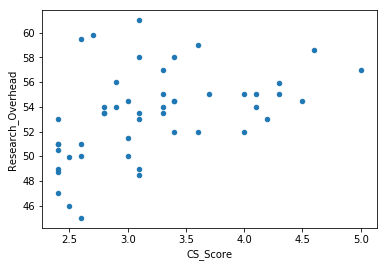

In [27]:
plotter(df,'CS_Score',"Research_Overhead")

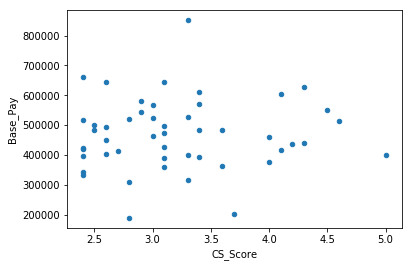

In [28]:
plotter(df,'CS_Score',"Base_Pay")

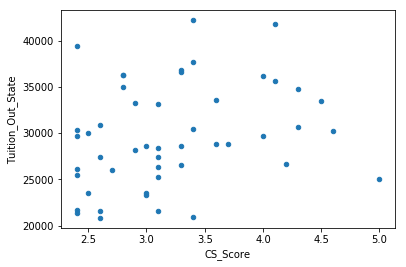

In [29]:
plotter(df,'CS_Score',"Tuition_Out_State")

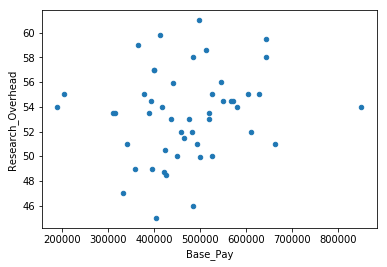

In [30]:
plotter(df,'Base_Pay',"Research_Overhead")

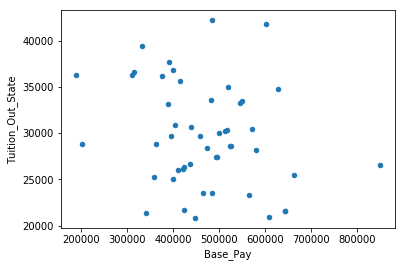

In [31]:
plotter(df,'Base_Pay',"Tuition_Out_State")

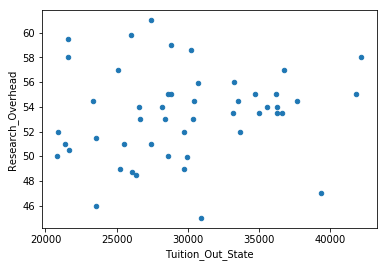

In [32]:
plotter(df,'Tuition_Out_State',"Research_Overhead")

# Task 3

In [33]:
logLikelihood = sst.norm(0,1).pdf(list(df["CS_Score"]))
print logLikelihood

[  1.48671951e-06   1.01408521e-05   1.59837411e-05   3.85351967e-05
   3.85351967e-05   5.89430678e-05   8.92616572e-05   8.92616572e-05
   1.33830226e-04   1.33830226e-04   4.24780271e-04   6.11901930e-04
   6.11901930e-04   1.23221917e-03   1.23221917e-03   1.23221917e-03
   1.23221917e-03   1.72256894e-03   1.72256894e-03   1.72256894e-03
   1.72256894e-03   3.26681906e-03   3.26681906e-03   3.26681906e-03
   3.26681906e-03   3.26681906e-03   3.26681906e-03   4.43184841e-03
   4.43184841e-03   4.43184841e-03   5.95253242e-03   5.95253242e-03
   7.91545158e-03   7.91545158e-03   7.91545158e-03   1.04209348e-02
   1.35829692e-02   1.35829692e-02   1.35829692e-02   1.35829692e-02
   1.75283005e-02   1.75283005e-02   2.23945303e-02   2.23945303e-02
   2.23945303e-02   2.23945303e-02   2.23945303e-02   2.23945303e-02
   2.23945303e-02]
